<a href="https://colab.research.google.com/github/AlexTran448/BiologyNotebooks/blob/main/needleman_wrunch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1:


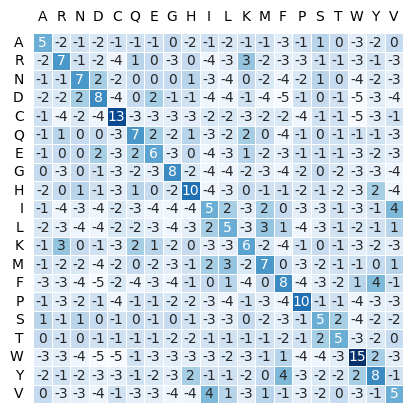

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# load blosum50 scoring matrix
blosum50 = pd.read_csv('blosum50.txt', index_col=0, sep = "-  | +", skipinitialspace=True, engine='python')
ax = sns.heatmap(blosum50, cmap='Blues', cbar=False, annot=True, linecolor='white', linewidths=0.5, square=True)
ax.xaxis.tick_top()
ax.tick_params(left=False, top=False)
plt.yticks(rotation=0)
plt.show()

In [ ]:
def needleman_wunsch(str1, str2, cost=8, graph=False):
  # init array
  matrix = np.zeros((len(str1) + 1, len(str2) + 1))
  dir = np.zeros(matrix.shape)

  #base case values of matrix
  matrix[:, 0] = range(0 , (len(str1) + 1) * - cost, - cost)
  dir[:, 0] = 2
  matrix[0, :] = range(0 , (len(str2) + 1) * - cost, - cost)
  dir[0, :] = 3
  dir[0,0] = 0

  # values to be calculated
  not_init = matrix[1:,1:]
  not_init_dir = dir[1:,1:]

  for (x, y), _ in np.ndenumerate(not_init):
    # case 1: up left
    ul = matrix[x, y] + blosum50.loc[str1[x], str2[y]]

    # case 2: left + gap cost
    l = matrix[x, y + 1] - cost

    # case 3: up + gap cost
    u = matrix[x + 1, y] - cost

    options = [ul, l, u]
    not_init[x,y] = max(options)

    # 1 = up left
    # 2 = left
    # 3 = up
    not_init_dir[x,y] = np.argmax(options) + 1

  backtrack_s1 = ""
  backtrack_s2 = ""

  i,j = not_init.shape
  while i > 0 or j > 0:
    match dir[i,j]:
      case 1: # no gaps
        backtrack_s1 = str1[i-1] + backtrack_s1
        backtrack_s2 = str2[j-1] + backtrack_s2
        i = i - 1
        j = j - 1
      case 2: #gap on string 2
        backtrack_s1 = str1[i-1] + backtrack_s1
        backtrack_s2 = '-' + backtrack_s2
        i = i - 1
      case 3: # gap on string 1
        backtrack_s1 = '-' + backtrack_s1
        backtrack_s2 = str2[j-1] + backtrack_s1
        j = j - 1
      case 0: # error or some how reached 0,0
        print(f'error occured. pointers ended at {i}, {j}')
  if not graph: return backtrack_s1, backtrack_s2

  matrix = matrix.T
  ax = sns.heatmap(matrix, cmap='Blues', cbar=False, annot=True, fmt='g', linecolor='white', linewidth=0.5,
                 xticklabels='-' + str1, yticklabels='-' + str2)
  ax.xaxis.tick_top()
  ax.set_aspect("equal")
  ax.tick_params(left=False, top=False)
  plt.yticks(rotation=0)

  # Backtrack values
  # Adding arrows based on the directions
  for i in range(0, dir.shape[0]):
    for j in range(0, dir.shape[1]):
      match dir[i,j]:
        case 1:
          ax.quiver(i + 0.2 , j + 0.2, -0.4, -0.4, color='orange', angles='xy', scale_units='xy')
        case 2:
          ax.quiver(i + 0.25, j + 0.5, -0.5, -0, color='red', angles='xy', scale_units='xy')
        case 3:
          ax.quiver(i + 0.5, j + 0.25, -0, -0.5, color='red', angles='xy', scale_units='xy')
  plt.show()
  return backtrack_s1, backtrack_s2

## testing HEAGAWGHEE versus PAWHEAE

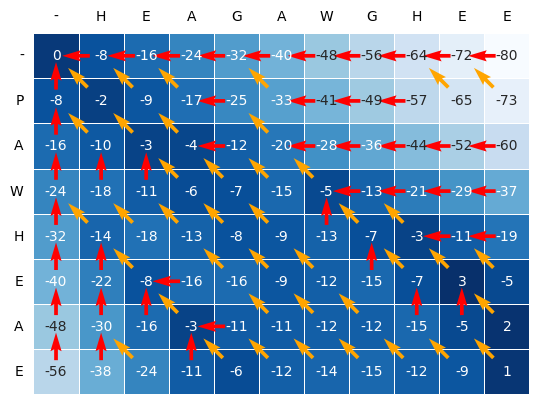

HEAGAWGHE-E
--P-AW-HEA-E


In [ ]:
# testing HEAGAWGHEE versus PAWHEAE
aligned1, aligned2 = needleman_wunsch('HEAGAWGHEE', 'PAWHEAE', graph=True)
print(aligned1)
print(aligned2)

The alignment matches the one on the slide

## SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL with PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY

In [ ]:
# SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL with PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY
aligned1, aligned2 = needleman_wunsch('SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL', 'PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY')
print(aligned1)
print(aligned2)

-SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL-
P-SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL-


# Part 2

In [ ]:
def smith_waterman(str1, str2, cost=8, graph=False):
  # init array
  matrix = np.zeros((len(str1) + 1, len(str2) + 1))
  dir = np.zeros(matrix.shape)

  #base case values of matrix
  matrix[:, 0] = 0
  dir[:, 0] = 0
  matrix[0, :] = 0
  dir[0, :] = 0
  dir[0,0] = 0

  # values to be calculated
  not_init = matrix[1:,1:]
  not_init_dir = dir[1:,1:]

  for (x, y), _ in np.ndenumerate(not_init):
    # case 1: up left
    ul = matrix[x, y] + blosum50.loc[str1[x], str2[y]]

    # case 2: left + gap cost
    l = matrix[x, y + 1] - cost

    # case 3: up + gap cost
    u = matrix[x + 1, y] - cost

    # case 4: base
    b = 0

    options = [b, ul, l, u]
    not_init[x,y] = max(options)
    not_init_dir[x,y] = np.argmax(options)

  # get resulting aligned string
  backtrack_s1 = ""
  backtrack_s2 = ""

  i,j = np.where(matrix == matrix.max())
  i = i[0]
  j = j[0]
  value = matrix[i,j]
  while i > 0 or j > 0:
    match dir[i,j]:
      case 1: # no gaps
        backtrack_s1 = str1[i-1] + backtrack_s1
        backtrack_s2 = str2[j-1] + backtrack_s2
        i = i - 1
        j = j - 1
      case 2: #gap on string 2
        backtrack_s1 = str1[i-1] + backtrack_s1
        backtrack_s2 = '-' + backtrack_s2
        i = i - 1
      case 3: # gap on string 1
        backtrack_s1 = '-' + backtrack_s1
        backtrack_s2 = str2[j-1] + backtrack_s1
        j = j - 1
      case 0: # reached 0, stop backtracking
        break
  if not graph: return backtrack_s1, backtrack_s2


  matrix = matrix.T
  ax = sns.heatmap(matrix, cmap='Blues', cbar=False, annot=True, fmt='g', linecolor='white', linewidth=0.5,
                 xticklabels='-' + str1, yticklabels='-' + str2)
  ax.xaxis.tick_top()
  ax.set_aspect("equal")
  ax.tick_params(left=False, top=False)
  plt.yticks(rotation=0)

  # Backtrack values
  # Adding arrows based on the directions
  for i in range(0, dir.shape[0]):
    for j in range(0, dir.shape[1]):
      match dir[i,j]:
        case 1:
          ax.quiver(i + 0.2 , j + 0.2, -0.4, -0.4, color='orange', angles='xy', scale_units='xy')
        case 2:
          ax.quiver(i + 0.25, j + 0.5, -0.5, -0, color='red', angles='xy', scale_units='xy')
        case 3:
          ax.quiver(i + 0.5, j + 0.25, -0, -0.5, color='red', angles='xy', scale_units='xy')
  plt.show()
  return backtrack_s1, backtrack_s2

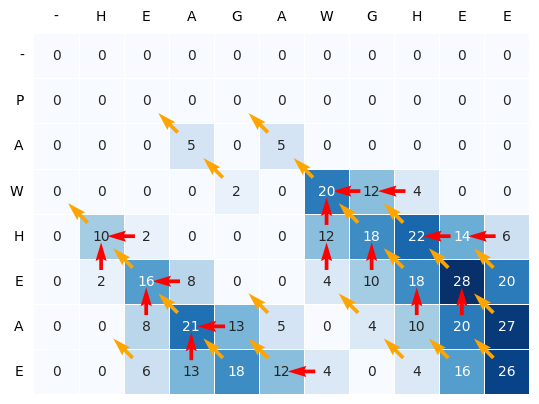

AWGHE
AW-HE


In [ ]:
a1, a2 = smith_waterman('HEAGAWGHEE', 'PAWHEAE', graph=True)
print(a1)
print(a2)

Matches results shown on slide

In [ ]:
#MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY and TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI
a1, a2 = smith_waterman('MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY', 'TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI')
print(a1)
print(a2)

HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRI
HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI


# Part 3:

In [ ]:
#Dishonesty in the casino
import random
random.seed(42)

def dishonest_casino(length = 100, start = 0):
  # initialising
  fair = [1/6] * 6 # fair dice state
  loaded = [1/10] * 5 + [1/2] # dishonest dice state

  # let index 0 = fair and index 1 = loaded dice
  states = [fair, loaded]

  transition = [[9/10, 1/10],
  [1/10, 9/10]]

  index = start
  emmisions = ''
  state_hist = ''
  for i in range(length):
    current = states[index]
    state_hist = state_hist + str(index)

    # calculate emmisions
    choice = random.choices(range(1,1 + len(current)), weights=current)[0]
    emmisions = emmisions + str(choice)

    # calculate state change
    current = transition[index]
    index = random.choices(range(len(current)), weights=current)[0]


  # convert to readable format assuming e = emmision and s = state
  mapping = {'0': 'fair', '1': 'loaded'}
  z = zip(emmisions, state_hist)
  for e, s in zip(emmisions, state_hist):
    s = mapping[s]
    print(f'[{s}] dice rolled [{e}]')

  return (emmisions, state_hist)



casino_results_rolls, casino_results_dice = dishonest_casino()

[fair] dice rolled [4]
[fair] dice rolled [2]
[fair] dice rolled [5]
[fair] dice rolled [6]
[fair] dice rolled [3]
[fair] dice rolled [2]
[fair] dice rolled [1]
[fair] dice rolled [4]
[fair] dice rolled [2]
[fair] dice rolled [5]
[fair] dice rolled [5]
[fair] dice rolled [3]
[fair] dice rolled [6]
[fair] dice rolled [1]
[fair] dice rolled [6]
[fair] dice rolled [5]
[fair] dice rolled [4]
[loaded] dice rolled [4]
[loaded] dice rolled [6]
[loaded] dice rolled [6]
[loaded] dice rolled [6]
[fair] dice rolled [2]
[fair] dice rolled [1]
[fair] dice rolled [1]
[fair] dice rolled [4]
[fair] dice rolled [3]
[fair] dice rolled [2]
[loaded] dice rolled [6]
[loaded] dice rolled [2]
[loaded] dice rolled [2]
[loaded] dice rolled [6]
[loaded] dice rolled [6]
[loaded] dice rolled [6]
[loaded] dice rolled [3]
[fair] dice rolled [2]
[fair] dice rolled [2]
[loaded] dice rolled [6]
[loaded] dice rolled [6]
[loaded] dice rolled [6]
[loaded] dice rolled [3]
[loaded] dice rolled [6]
[loaded] dice rolled [6]


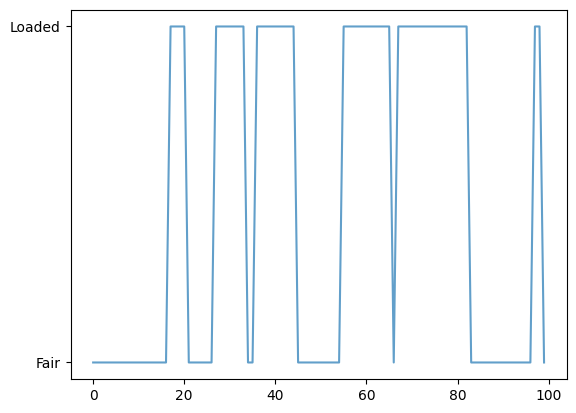

In [ ]:
x = range(len(casino_results_dice))
def mapping(x):
  match x:
    case '0':
      return 'Fair'
    case '1':
      return 'Loaded'

mapped = map(mapping, [*casino_results_dice])
y = list(mapped)
plt.plot(x, y, alpha=0.7, label="actual state")

Looks fairly similar to pattern shown on page 36, L11
Loaded dice tend to roll 6 very often, fair dice has a more equal distribution.

In [ ]:
import random
random.seed(810)
#genes markov chain
def dna_generator(length = 2000, start = [0.5,0.5]):
  # initialising
  # probabilitity of A, T, C, G
  left = [0.2698, 0.3297, 0.2080, 0.1985]
  right = [0.2459, 0.2079, 0.2479, 0.2984]

  states = [left, right]

  transition = [[0.9997, 0.0003],
  [0.0002, 0.9998]]

  index = random.choices(range(len(start)), weights=start)[0]

  emmisions = ''
  state_hist = ''
  for i in range(length):
    current = states[index]
    state_hist = state_hist + str(index)

    # calculate emmisions
    choice = random.choices(range(len(current)), weights=current)[0]
    emmisions = emmisions + str(choice)

    # calculate state change
    current = transition[index]
    index = random.choices(range(len(current)), weights=current)[0]


  # convert to readable format assuming e = emmision and s = state
  e_mapping = {'0': 'A', '1': 'T', '2': 'C', '3': 'G'}
  s_mapping = {'0': 'AT Rich', '1': 'CG Rich'}
  emmisions = [e_mapping[i] for i in emmisions]
  emmisions = "".join(emmisions)

  # map strings to appropriate length
  last_state = ''
  output = ""
  length = 0
  for letter, state in zip(emmisions, state_hist):
    if (state != last_state):
      last_state = state
      output = output + f"\nFrom {s_mapping[state]}:\n"
      length = 0
    output = output + letter
    if length > 50:
      length = 0
      output = output + '\n'

    length+=1
  print(output)
  return emmisions, state_hist



dna_results_emmisions, dna_results_state = dna_generator()


From CG Rich:
CAGCACGTAAAACCTTTCGATCGAGGACCTCGCACCGATATATGGCCTGCAG
TAGGGGATAGGCTTCTCTTTGGCTCTAGAGGACTTTGCGCAATCCGCAGTC
CTCACACCTAACACCCCGTTACCTCGACCCTAACGTGGACACATTATGTGG
GTCCGAGCGCTAAACCTCATAAGACATGTATCGACGACCTTTATTTCGTCG
CTGTTTATAATACCTATTGGTGGTATTCAAGGACCATTGACTGGAACTCAA
CCACCGTGAGTCCCACTACCCGCGAGAACTCGCTGTCAAGCGGGAGGGCGA
TCGGGCGATGCCCGCGAGGGTTGTCGTCCACAGCGGCAAGAGGGAGTTATC
CTAGAGGCCAGGCGAGGTTGACGAGGGGTGAGCCTCTCACGGCTTTCAATG
GTCAGGCAGTGCCCCACAGGAGCCGAATATTTAGCCGACTTCGTCTGAGGC
AGCATTCGTATAAAGTTCTCCCCCACTCATTTAGAAGCGCCCTAATCTAGT
GTCGTCCTATCACTGGTCGGGCACAGGCGTGCGTGAGCTTGCCGGACGGAA
CCCACGTTGGGTCGCGTTCCAAGTGTGAGCGGCAGCACGTTGCGCGCGGAG
CTAAACAGACGATGAAGTCAAAATAGTTCTCCAGGGGCACAAGACTGGGCA
AGGATCTGCTACACACGGGGGAGGTGCGTTGGGAGTAACGGAAGCTACGGG
CTCTTTGCGAAGAACTAGCGATTTGGACACCAAGTTTAAGGGCGCTCCAGA
TTACGTGAGGACGGCCTGGTCTAGTCTCGATATTACCCACTTCCGAATCGA
ATGTGTGCAGAACCGCCCACATAGATGAAGACCAACGTCTGAACGCGGGTC
TTACTCGTATGCGATAGATGCACAGCAGCCATGTACATGTGCAGGCTACTG
CGATGCGTGGGACGATCCTAGAGCGTGAGGCGTTCGGGGAATCATGAT

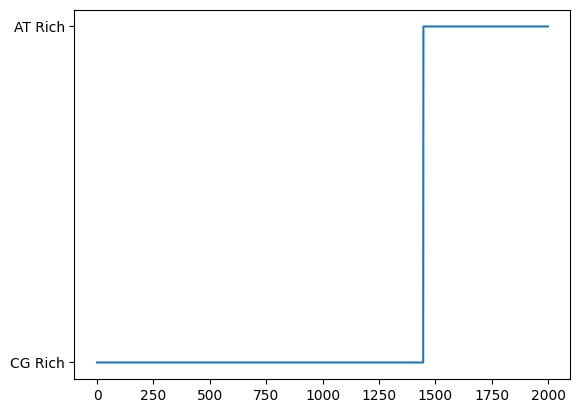

In [ ]:
from matplotlib import pyplot as plt
x = range(len(dna_results_state))
def mapping(x):
  match x:
    case '0':
      return 'AT Rich'
    case '1':
      return 'CG Rich'

mapped = map(mapping, [*dna_results_state])
y = list(mapped)
plt.plot(x, y)
plt.show()

# Part 4:

In [ ]:
# Viterbi algorithm
import math
def safe_log(x):
    return math.log(x) if x > 0 else float('-inf')

def viterbi(seq, state, transition, emission):
  # log probabilities at begining to save time on calculation
  vec_log = np.vectorize(safe_log)
  transition = vec_log(transition)

  emission = vec_log(emission)
  logged_start_state = []
  for i in state:
    logged_start_state += [safe_log(i)]

  time_length = len(seq)
  state_num = len(state)
  matrix = np.zeros((time_length, state_num))
  matrix[0,:] = logged_start_state
  route = np.zeros((time_length, state_num), dtype='int8')

  for t in range(1, time_length):
    e = seq[t]
    prev_prob = []
    for s in range(state_num):
      prev_prob = matrix[t-1, :] + transition[:, s]
      route[t,s] = np.argmax(prev_prob)

      prob_emission = emission[s,int(e)] + max(prev_prob)
      matrix[t, s] = prob_emission
  backtrack = []
  t_pointer = time_length - 1
  s_pointer = np.argmax(matrix[-1,:])
  output = str(s_pointer)
  while t_pointer >= 0:
    #backtrack until reaching start of chain
    s_pointer = route[t_pointer,s_pointer]
    t_pointer -= 1
    output = str(s_pointer) + output
  print(matrix)
  return output





    # calculate previous states maximum

# test to see probabilities match in slides
transition = np.array([[9/10,1/10],[1/10,9/10]])
emission = np.array([[1/6,1/6,1/6,1/6,1/6,1/6],[1/10,1/10,1/10,1/10,1/10,1/2]])
result = viterbi('3244', [1,0], transition, emission)
mapping = {'0': 'H', '1': 'T'}
result = "".join([mapping[x] for x in result])
print(f'expected chain from slide is {result}')

[[ 0.                -inf]
 [-1.89711998 -4.60517019]
 [-3.79423997 -6.50229017]
 [-5.69135995 -8.39941016]]
expected chain from slide is HHHHH


In [ ]:
# Testing on output from dishonest casino :(

# clean results for function
casino_results_rolls = ''.join([str(int(x) - 1) for x in casino_results_rolls])
assumed_results_dice = viterbi(casino_results_rolls, [1,0], transition, emission)

[[   0.                  -inf]
 [  -1.89711998   -4.60517019]
 [  -3.79423997   -6.50229017]
 [  -5.69135995   -6.78997224]
 [  -7.58847994   -9.19791785]
 [  -9.48559992  -11.60586346]
 [ -11.38271991  -14.01380907]
 [ -13.27983989  -15.9878901 ]
 [ -15.17695988  -17.88501008]
 [ -17.07407986  -19.78213007]
 [ -18.97119985  -21.67925005]
 [ -20.86831983  -23.57637003]
 [ -22.76543982  -23.86405211]
 [ -24.6625598   -26.27199772]
 [ -26.55967979  -27.07050541]
 [ -28.45679977  -29.47845102]
 [ -30.35391976  -31.88639663]
 [ -32.25103974  -34.29434224]
 [ -34.14815973  -35.09284993]
 [ -36.04527971  -35.89135763]
 [ -37.9423997   -36.68986533]
 [ -39.83951968  -39.09781094]
 [ -41.73663967  -41.50575654]
 [ -43.63375965  -43.91370215]
 [ -45.53087964  -46.32164776]
 [ -47.42799962  -48.72959337]
 [ -49.32511961  -51.13753898]
 [ -51.22223959  -51.93604667]
 [ -53.11935958  -54.34399228]
 [ -55.01647956  -56.75193789]
 [ -56.91359955  -57.55044559]
 [ -58.81071953  -58.34895328]
 [ -60.7

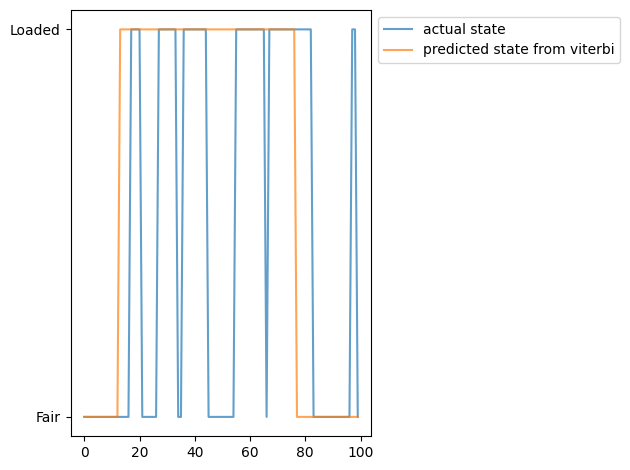

In [ ]:
x = range(len(casino_results_dice))
def mapping(x):
  match x:
    case '0':
      return 'Fair'
    case '1':
      return 'Loaded'

mapped = map(mapping, [*casino_results_dice])
y = list(mapped)
plt.plot(x, y, alpha=0.7, label="actual state")
y1 = list(map(mapping, [*assumed_results_dice][:-1]))
plt.plot(x,y1, alpha = 0.7, label="predicted state from viterbi")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
def mapping(x):
  if x == '0': return 'F'
  else: return 'L'
print(''.join(list(map(mapping,casino_results_dice))))
print(''.join(list(map(mapping,assumed_results_dice))))

FFFFFFFFFFFFFFFFFLLLLFFFFFFLLLLLLLFFLLLLLLLLLFFFFFFFFFFLLLLLLLLLLLFLLLLLLLLLLLLLLLLFFFFFFFFFFFFFFLLF
FFFFFFFFFFFFFLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFF


The viterbi algorithm did not capture when the dice flipped and can ignore if the time between flips is too short compared to the actual results.

It has a 'smoothing' effect

In [ ]:
# testing on DNA sequence
left = [0.2698, 0.3297, 0.2080, 0.1985]
right = [0.2459, 0.2079, 0.2479, 0.2984]

states = [left, right]

transition = [[0.9997, 0.0003],
  [0.0002, 0.9998]]

#clean string
def mapping(x):
  match x:
    case 'A': return 0
    case 'T': return 1
    case 'C': return 2
    case 'G': return 3
clean_dna_emissions = list(map(mapping, dna_results_emmisions))
assumed_result = viterbi(clean_dna_emissions, [0.5,0.5], transition, states)

[[-6.93147181e-01 -6.93147181e-01]
 [-2.00352156e+00 -2.09617753e+00]
 [-3.62078778e+00 -3.30569796e+00]
 ...
 [-2.75496686e+03 -2.76158089e+03]
 [-2.75627724e+03 -2.76298392e+03]
 [-2.75784775e+03 -2.76437885e+03]]


In [ ]:
# display results in nice to read format
# only print where switches in prediction, actual occur and where there are differences
prev_i = ''
prev_j = ''
skipping = False
for i,j in zip(dna_results_state, assumed_result):
  if i == prev_i and j == prev_j and i == j:
    prev_i = i
    prev_j = j
    if skipping: continue
    else:
      skipping = True
      print('repeating...')
      continue
  print (f'actual: {i} vs predicted: {j}')
  skipping = False
  prev_i = i
  prev_j = j

actual: 1 vs predicted: 0
actual: 1 vs predicted: 1
repeating...
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1
actual: 0 vs predicted: 1

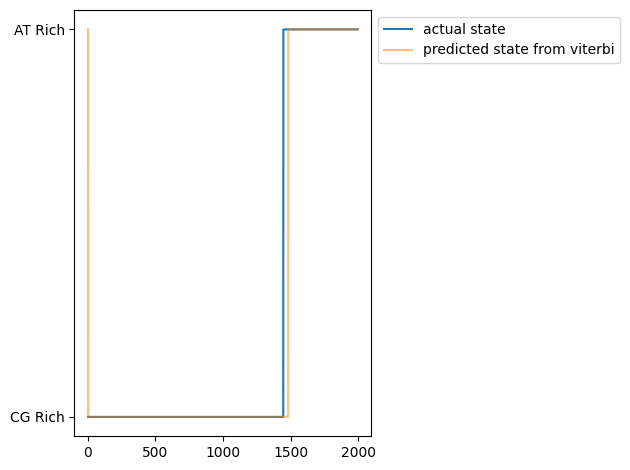

In [ ]:
x = range(len(dna_results_state))
def mapping(x):
  match x:
    case '0':
      return 'AT Rich'
    case '1':
      return 'CG Rich'

mapped = map(mapping, [*dna_results_state])
y = list(mapped)
plt.plot(x, y, label="actual state")
y1 = list(map(mapping, [*assumed_result][:-1]))
plt.plot(x,y1, alpha = 0.5, label="predicted state from viterbi")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

It is very unlikely for a switch between AT Rich and CG rich so missing switches are noticiable.

The viterbi algorithm appears to predict switches both earlier and before the actual switch occurs.

In [ ]:
file = 'enteriobacteriophage.txt'
with open(file, 'r') as file: # reading the file
  string = file.read()

string = string.replace('\n', '')
# testing on DNA sequence
left = [0.2698, 0.3297, 0.2080, 0.1985]
right = [0.2459, 0.2079, 0.2479, 0.2984]

states = [left, right]

transition = [[0.9997, 0.0003],
  [0.0002, 0.9998]]

#clean string
def mapping(x):
  match x:
    case 'A': return 0
    case 'T': return 1
    case 'C': return 2
    case 'G': return 3
clean_string = list(map(mapping, string))
assumed_result = viterbi(clean_string, [0.5,0.5], transition, states)

[[-6.93147181e-01 -6.93147181e-01]
 [-2.31041340e+00 -1.90266761e+00]
 [-3.92767963e+00 -3.11218804e+00]
 ...
 [-6.65966262e+04 -6.66036281e+04]
 [-6.65981967e+04 -6.66050230e+04]
 [-6.65998140e+04 -6.66062325e+04]]


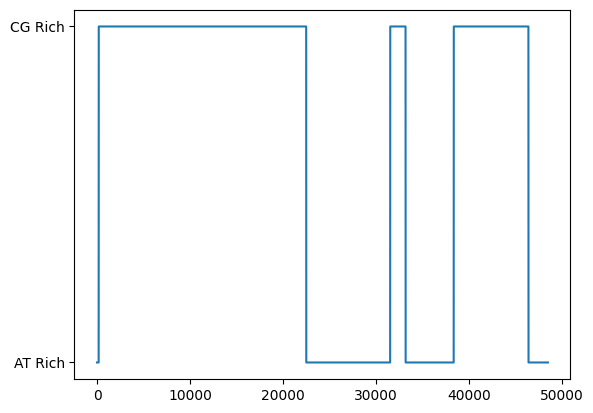

In [ ]:
x = range(len(assumed_result))
def mapping(x):
  match x:
    case '0':
      return 'AT Rich'
    case '1':
      return 'CG Rich'

mapped = map(mapping, [*assumed_result])
y = list(mapped)
plt.plot(x, y)
plt.show()

[[0.87388594 0.12611406]
 [0.87414749 0.12585251]
 [0.87455558 0.12544442]
 ...
 [0.9822313  0.0177687 ]
 [0.98187846 0.01812154]
 [0.98158301 0.01841699]]


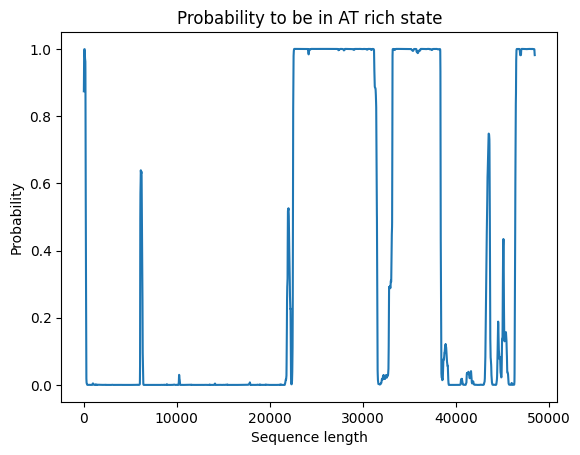

In [ ]:
import numpy as np

def soft_output_viterbi(sequence, start, transition, emission):
    num_states = len(start)
    sequence_length = len(sequence)
    # Initialize the forward and backward matrices with zeros
    fwd = np.zeros((sequence_length, num_states))
    bwd = np.zeros((sequence_length, num_states))
    posterior_probs = np.zeros((sequence_length, num_states))

    # Initialization step for forward pass
    fwd[0, :] = start + emission[:, sequence[0]]

    for i in range(1, sequence_length):

        log_probs = fwd[i - 1, :] + transition # previous probability * transition for this node
        # logaddexp likely safer than own implementation
        fwd[i, :] = np.logaddexp.reduce(log_probs, axis=1) + emission[:, sequence[i]]

    bwd[-1, :] = 0

    for i in reversed(range(sequence_length-1)):
        log_probs = bwd[i + 1, :] + transition[:, :] + emission[:, sequence[i + 1]]
        bwd[i, :] = np.logaddexp.reduce(log_probs, axis=1)

    # Calculate the posterior probabilities and exponentiate
    for i in range(sequence_length):
        posterior_probs[i, :] = fwd[i, :] + bwd[i, :] - np.logaddexp.reduce(fwd[i, :] + bwd[i, :])
    posterior_probs = np.exp(posterior_probs)

    return posterior_probs

start = np.log(np.array([0.5, 0.5]))
transition = np.log(np.array([[0.9997, 0.0003], [0.0002, 0.9998]]))
emission = np.log(np.array([[0.2698, 0.3297, 0.2080, 0.1985],
                                  [0.2459, 0.2079, 0.2478, 0.2984]]))

# Convert string to numerical representation of emissions
mapping = {'A': 0, 'T': 1, 'C': 2, 'G': 3}
clean_string = [mapping[x] for x in string]
posterior_probs = soft_output_viterbi(clean_string, start, transition, emission)

print(posterior_probs)
x = range(len(posterior_probs))
plt.plot(x, posterior_probs[:,0])
plt.title('Probability to be in AT rich state')
plt.xlabel('Sequence length')
plt.ylabel('Probability')
plt.show()